**Problem Statement**

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

    Hint:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn import decomposition
    from sklearn import datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:,['species']].values
x = StandardScaler().fit_transform(x)

In [4]:
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [6]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Pcomp 1', 'Pcomp 2','Pcomp 3'])

principalDf.head(5)

,Pcomp 1,Pcomp 2,Pcomp 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [7]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head(5)

,Pcomp 1,Pcomp 2,Pcomp 3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa


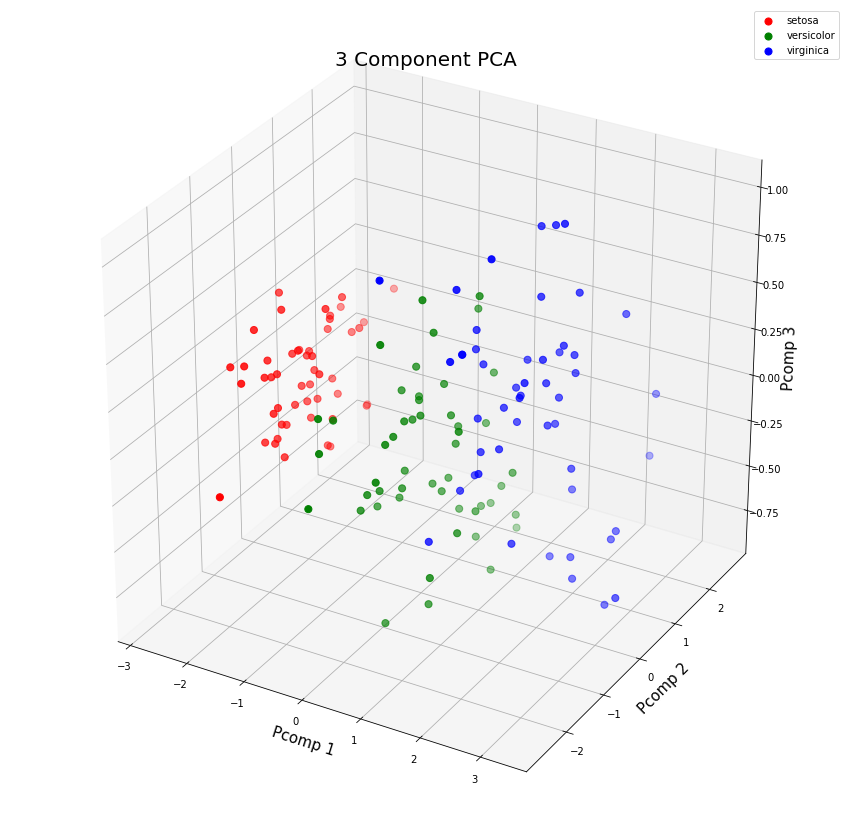

In [8]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Pcomp 1', fontsize = 15)
ax.set_ylabel('Pcomp 2', fontsize = 15)
ax.set_zlabel('Pcomp 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Pcomp 1']
               , finalDf.loc[indicesToKeep, 'Pcomp 2']
               , finalDf.loc[indicesToKeep, 'Pcomp 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()